In [1]:
import pandas as pd
import numpy as np

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
df = pd.read_csv(r'G:\Traning\Data/co2_mm_mlo.csv')

In [4]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [15]:
df['date'] = pd.to_datetime(dict(year=df['year'],month=df['month'],day=1))

In [16]:
df.head()

,year,month,decimal_date,average,interpolated,date
date,,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71,1958-03-01
1958-04-01,1958,4,1958.292,317.45,317.45,1958-04-01
1958-05-01,1958,5,1958.375,317.50,317.50,1958-05-01
1958-06-01,1958,6,1958.458,NaN,317.10,1958-06-01
1958-07-01,1958,7,1958.542,315.86,315.86,1958-07-01


In [17]:
df.set_index('date',inplace=True)


In [18]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


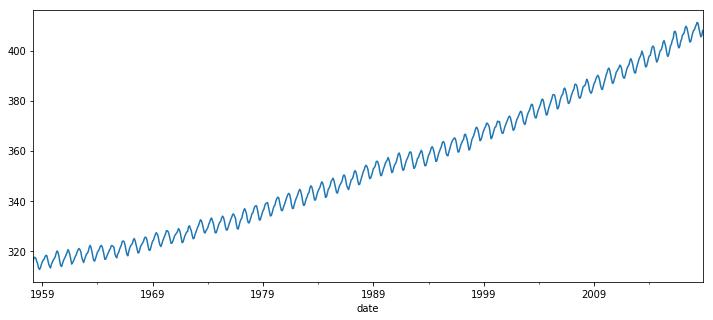

In [20]:
#
ax = df['interpolated'].plot(figsize=(12,5))
ax.autoscale(axis='x',tight=True)

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

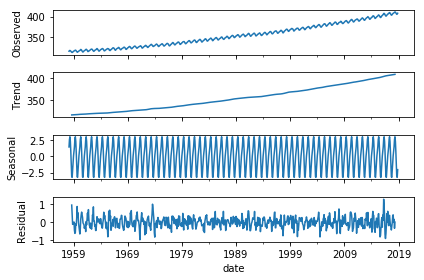

In [23]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

In [24]:
from pmdarima import auto_arima

In [25]:
auto_arima(df['interpolated'], seasonal = True, m=12).summary()

C:\Users\Raj\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Raj\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Raj\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Raj\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Raj\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.374
Date:                            Sun, 28 Jun 2020   AIC                            428.748
Time:                                    12:50:39   BIC                            451.700
Sample:                                         0   HQIC                           437.604
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.627e-05      0.000      0.316      0.752      -0.000       0.000
ma.L1         -0.3808      0.034    -11.128      0.000      -0.448      -0.314
ar.S.L12       0.9997      0.000   3327.065      0.000       0.999       1.000
ma.S.L12      -0.8662      0.021    -40.396      0.000      -0.908      -0.824
sigma2         0.0964      0.005     20.334      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       51.32   Jarque-Bera (JB):                 3.93
Prob(Q):                              0.11   Prob(JB):                         0.14
Heteroskedasticity (H):               1.13   Skew:                            -0.04
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
len(df)

729

In [27]:
train = df.iloc[:717]
test = df.iloc[717:]

In [29]:
#SARIMAX(0, 1, 1)x(1, 0, 1, 12)

model = SARIMAX(train['interpolated'],order =(0,1,1), seasonal_order=(1,0,1,12))
model_result = model.fit()
model_result.summary()

C:\Users\Raj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.152
Date:                            Sun, 28 Jun 2020   AIC                            418.305
Time:                                    13:04:50   BIC                            436.599
Sample:                                03-01-1958   HQIC                           425.369
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3734      0.034    -10.955      0.000      -0.440      -0.307
ar.S.L12       0.9997      0.000   3173.650      0.000       0.999       1.000
ma.S.L12      -0.8647      0.023    -37.559      0.000      -0.910      -0.820
sigma2         0.0963      0.005     20.193      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       52.09   Jarque-Bera (JB):                 3.81
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.03
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
# predicted values
start = len(train)
end = len(train)+len(test)-1
pred = model_result.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Predictions')

In [34]:
for i in range(len(pred)):
    print(f"pred={pred[i]:<11.10}, expected={test['interpolated'][i]}")

pred=406.58403  , expected=406.81
pred=407.7865182, expected=407.96
pred=408.5317502, expected=408.32
pred=409.4372114, expected=409.41
pred=410.996754 , expected=410.24
pred=411.6003758, expected=411.24
pred=410.8189402, expected=410.79
pred=409.1272558, expected=408.71
pred=407.0262503, expected=406.99
pred=405.5758875, expected=405.51
pred=405.8475793, expected=406.0
pred=407.3827204, expected=408.02


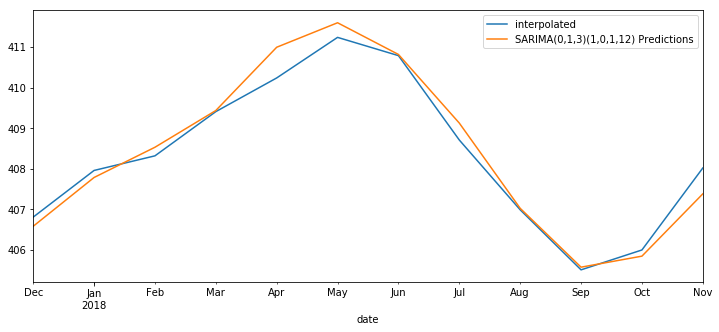

In [35]:
# plot for known values
ax= test['interpolated'].plot(legend=True,figsize=(12,5))
pred.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [36]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['interpolated'],pred)
print('MSE Error',error)

MSE Error 0.11993638848229593


In [37]:
from statsmodels.tools.eval_measures import rmse
error_rms = rmse(test['interpolated'],pred)
print(error_rms)

0.3463183340256417


In [38]:
# retrain the model on the ful data , and forecast the future
modelRe = SARIMAX(df['interpolated'], order=(0,1,1),seasonal_order=(1,0,1,12))
result_Re = modelRe.fit()
fcast = result_Re.predict(len(df),len(df)+11, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) forcast')

C:\Users\Raj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


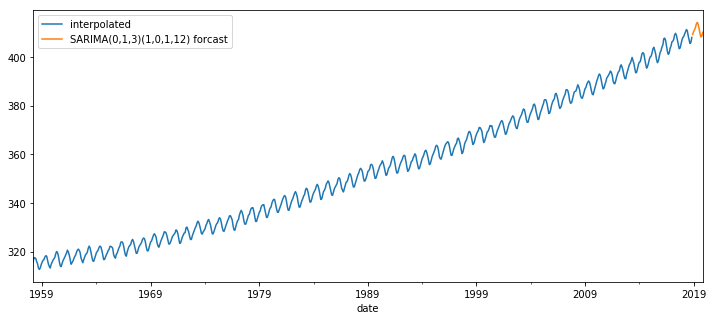

In [39]:
ax = df['interpolated'].plot(legend=True,figsize=(12,5))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)